<a href="https://colab.research.google.com/github/adamarispadilla/final-project/blob/main/Padilla_K_means_Clustering_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the following data about google review ratings accross location in europe, find the average minimum and maximum of average ratings of parks between the average ratings of gardens.


In [ ]:
#call required libraries
import numpy as np                  ##used for mathematical operations on arrays 
import pandas as pd                 ##used for data analysis 
import matplotlib.pyplot as plt     ##used for plotting 
from sklearn.cluster import KMeans  ##used for clustering


In [ ]:
##Reads CSV file that contains data that will be analyzed and transforms it into a dataframe

df=pd.read_csv("google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
##displays the info of the data such as data type and columns 
##For example, there are 5456 rows in this dataframe and 26 columns.
df.info

<bound method DataFrame.info of            User  Category 1  Category 2  ...  Category 23  Category 24  Unnamed: 25
0        User 1        0.00        0.00  ...          0.0         0.00          NaN
1        User 2        0.00        0.00  ...          0.0         0.00          NaN
2        User 3        0.00        0.00  ...          0.0         0.00          NaN
3        User 4        0.00        0.50  ...          0.0         0.00          NaN
4        User 5        0.00        0.00  ...          0.0         0.00          NaN
...         ...         ...         ...  ...          ...          ...          ...
5451  User 5452        0.91        5.00  ...          5.0         1.56          NaN
5452  User 5453        0.93        5.00  ...          5.0         1.09          NaN
5453  User 5454        0.94        5.00  ...          5.0         1.11          NaN
5454  User 5455        0.95        4.05  ...          5.0         1.12          NaN
5455  User 5456        0.95        4.07  ...

In [ ]:
##states the rows and columns of the dataframe
##This dataframe has 5722 rows and 14 columns 
print(df.shape)

(5456, 26)


In [ ]:
##returns the number of missing values in the data set
##There is missing data in data value, supressed, etc.
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [ ]:
#removes the missing values with NaNs and outputs the new number of
##rows and columns which are 2878 rows and 14 columns
df=df.dropna(subset=['Category 4','Category 24'])
print(df.shape)

(5455, 26)


Text(0, 0.5, 'Average Rating on Parks')

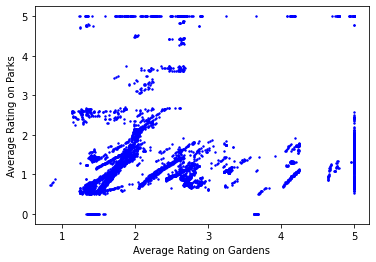

In [ ]:
#transforms the data into a scatter plot with coulumn names,labels, and color selection
plt.scatter(df['Category 4'],df['Category 24'], c='blue', s=2)
plt.xlabel("Average Rating on Parks")
plt.ylabel("Average Rating on Gardens")

In [ ]:
##This section starts clustering using k-means
##K value or Silhouette Coefficient gives us how well the clusters fit. 
##Here K values has a value of 2. 
k=2
X=np.array(list(zip(df['Category 4'], df['Category 24'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)

[1 1 1 ... 0 0 0]
[[2.07088633 1.54259139]
 [4.78125257 1.61041068]]


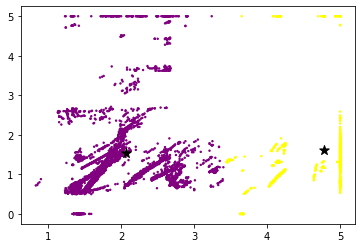

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['purple', 'yellow', 'red','green', 'blue']
colors=[c[i] for i in labels]

plt.scatter(df['Category 4'], df['Category 24'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

Based on the result, we came up with the following two rating amounts:

Garden 2.07, Parks 1.54

Garden 4.78, Parks 1.61

In [ ]:
## determine the silhouette coefficient/score (k)
## We want to aim for a score that is close to 1 because if they are closer to 1 
## it means that clusters are well apart from each other and clearly distinguished.
## Here it shows that 3 gives us a score closest to 1. 
from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')

silhouette Score (n=3): 0.6429878465592964


Based on the following data about online shoppers intentions, find the average minimum and maximum of exit rates (in percentages) between the bounce rates (in percentages). 

Bounce Rate is the percentage of people that land on a page and leave. 

Exit Rate is the percentage of people that leave a specific page.



In [ ]:
#call required libraries
import numpy as np                  ##used for mathematical operations on arrays 
import pandas as pd                 ##used for data analysis 
import matplotlib.pyplot as plt     ##used for plotting 
from sklearn.cluster import KMeans  ##used for clustering 

In [ ]:
##CSV file that contains data that will be analyzed and transforms it into a dataframe

df=pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
##displays the info of the data such as data type and columns 
##For example, there are 18 columns in this dataframe and there is 7 
##category that only contains integers.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
##states the rows and columns of the dataframe
##This dataframe has 12330 rows and 18 columns 
print(df.shape)

(12330, 18)


In [ ]:
##returns the number of missing values in the data set
##There is missing data in data value, supressed, etc.
##Since all of them are 0, data is clean
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
##cleaning the data nontheless, removes the missing values with NaNs
df=df.dropna(subset=['BounceRates','ExitRates'])
print(df.shape)

(12330, 18)


Text(0, 0.5, 'Exit Rates')

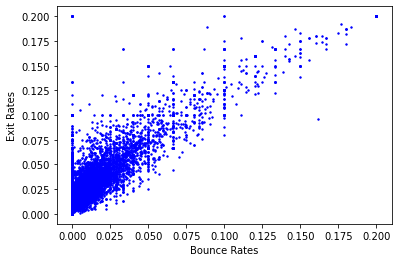

In [ ]:
#transforms the data into a scatter plot with coulumn names,labels, and color selection
plt.scatter(df['BounceRates'],df['ExitRates'], c='blue', s=2)
plt.xlabel("Bounce Rates")
plt.ylabel("Exit Rates")

In [ ]:
##This section starts clustering using k-means
##K value or Silhouette Coefficient gives us how well the clusters fit. 
##Here K values has a value of 2. 

k=2
X=np.array(list(zip(df['BounceRates'], df['ExitRates'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[1 0 1 ... 0 0 0]
[[0.00937308 0.03132228]
 [0.17913638 0.18694403]]


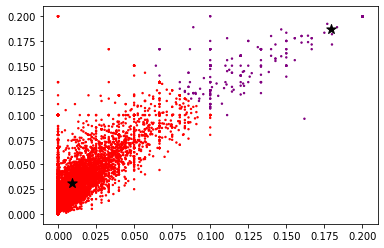

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['red', 'purple', 'blue','yellow', 'orange']
colors=[c[i] for i in labels]

plt.scatter(df['BounceRates'], df['ExitRates'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

exit rate average min = 0.9%, bounce rate = 3%

exit rate average max = about 18%, bounce rate = 19%


In [ ]:
## determine the silhouette coefficient/score (k)
## We want to aim for a score that is close to 1 because if they are closer to 1 
## it means that clusters are well apart from each other and clearly distinguished.
## Here it shows that 2 gives us a score closest to 1. from sklearn.metrics import silhouette_score
model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


silhouette Score (n=2): 0.8439630343662865
